## **TP2: Métodos** 

In [39]:
import numpy as np
import matplotlib as plt
import numpy.linalg as lng
from scipy.linalg import lu
from scipy import linalg
import networkx as nx
from scipy.stats.stats import pearsonr
import pandas as pd
import metnum as mt

Leer grafos

In [3]:
def leer_grafo(path):
    file = open(path,'r')
    n = int(file.readline())
    m = int(file.readline())
    M = np.zeros((n, n))
    i = 0
    with open(path,'r') as file:
    # reading each line    
        for line in file:
            if(i>1):
                a = int(line.split()[0])
                b = int(line.split()[1])
                M[a-1][b-1] = 1
            i+=1
    return M

In [4]:
def leer_karateclub(path = "../datasets/karateclub_matriz.txt"):
  M = np.zeros(34*34).reshape(34, 34)
  with open(path,'r') as file:
    # reading each line 
    i = 0
    for line in file:
      line = line.split()
      for j in range(0, len(line)):

        M[i][j] = line[j]
      i+=1
  return M

In [5]:
def leer_labels_karate(path = "../datasets/karateclub_labels.txt"):
    file = open(path,'r')
    labels = np.zeros(34)
    i = 0
    with open(path,'r') as file:
    # reading each line    
        for line in file:
            labels[i] = line
            i+=1
    return labels

In [6]:
M = leer_karateclub()
import sys 
np.set_printoptions(threshold=sys.maxsize)
np.sum(M)


156.0

Leer karate club con NetworkX

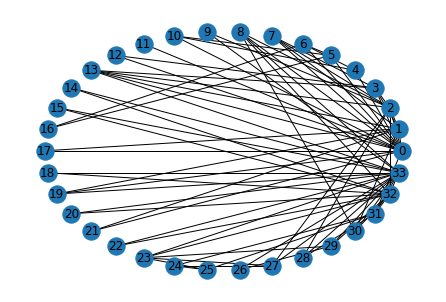

In [9]:
karate = nx.karate_club_graph()
nx.draw_circular(karate, with_labels = True)

# Centralidad del vector 

In [10]:
A = leer_karateclub()
A_labels = leer_labels_karate()

In [11]:
eigval, eigvect = linalg.eig(A)

L = np.zeros(34*34).reshape(34, 34)
np.fill_diagonal(L, np.sum(A, axis = 1))
L = L-A

In [26]:
L_eigval, L_eigvect = mt.deflation(L, 34, 10000, 1e-10)
print(L_eigval)
#L_eigval, L_eigvect = np.linalg.eig(L)
#sort 
sort_labels_eigval = np.argsort(L_eigval)
L_eigval = L_eigval[sort_labels_eigval]
L_eigvect = L_eigvect[::, sort_labels_eigval]
print(L_eigval)

[ 1.81366959e+01  1.70551712e+01  1.33061223e+01  1.09210675e+01
  9.77724097e+00  6.99619702e+00  6.51554460e+00  6.33159226e+00
  5.61803398e+00  5.37859510e+00  4.58079263e+00  4.48000769e+00
  4.27587684e+00  3.47218738e+00  3.38196564e+00  3.37615448e+00
  3.24206749e+00  3.01396297e+00  2.74915717e+00  2.48709174e+00
  1.99999998e+00  1.99999998e+00  1.99999998e+00  1.99999998e+00
  1.99999998e+00  1.95505053e+00  1.82605521e+00  1.76189863e+00
  1.59928308e+00  1.25940411e+00  1.12501072e+00  9.09247665e-01
  4.68525227e-01 -3.25191830e-09]
[-3.25191830e-09  4.68525227e-01  9.09247665e-01  1.12501072e+00
  1.25940411e+00  1.59928308e+00  1.76189863e+00  1.82605521e+00
  1.95505053e+00  1.99999998e+00  1.99999998e+00  1.99999998e+00
  1.99999998e+00  1.99999998e+00  2.48709174e+00  2.74915717e+00
  3.01396297e+00  3.24206749e+00  3.37615448e+00  3.38196564e+00
  3.47218738e+00  4.27587684e+00  4.48000769e+00  4.58079263e+00
  5.37859510e+00  5.61803398e+00  6.33159226e+00  6.5155

In [28]:
#print(pearsonr(A_labels, L_eigvect))

''' MATRIZ DE CORRELACION CON CORRCOEF
    a   b   c   d   .   .   .
a |a.a|a.b|a.c|a.d|....
b |b.a|b.b|b.c|b.d|....
c |c.a|c.b|c.c|c.d|....
d |d.a|d.b|d.c|d.d|....
. |...
. |...
. |...
'''

#A_labels = np.atleast_2d(A_labels)

#label con eigvect 
#labels_eig = L_eigvect >= 0
#labels_eig = labels_eig.astype(float)

A_labels = leer_labels_karate()
#print(A_labels.shape)
#print(labels_eig.shape)

C = np.hstack([L_eigvect, A_labels.reshape(34,1)])
#print(labels_eig)
#print(A_labels.reshape(34,1))

#correlation matrix 
C = abs(np.corrcoef(C.T))

corr = C[:, 34]
corr[34]=0
print(corr)


[4.56896091e-02 8.14720293e-01 2.65951016e-01 3.33292366e-01
 4.46468645e-04 5.57556319e-02 2.71677736e-02 6.87699830e-02
 1.11865912e-02 1.03173805e-05 7.87926580e-06 3.31794798e-06
 1.03141598e-05 2.08034903e-06 1.17402711e-01 1.61346031e-01
 9.56063601e-03 8.67031644e-02 6.51275089e-02 5.34998048e-04
 3.03523713e-04 1.07905734e-02 4.49214728e-02 7.98739932e-02
 2.44850113e-01 7.81034269e-05 1.41377613e-02 7.91773937e-02
 1.04474248e-02 8.50853206e-02 5.82783031e-02 7.84100419e-02
 1.14499878e-02 4.56897750e-02 0.00000000e+00]


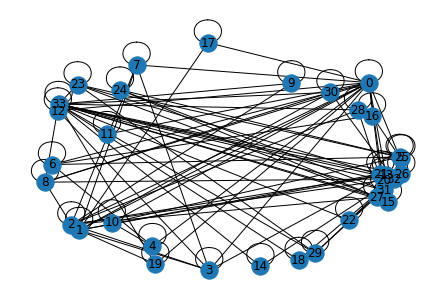

In [29]:
L_g = nx.from_numpy_array(L)
nx.draw_spring(L_g,  with_labels = True)

In [30]:
centrality = nx.eigenvector_centrality(L_g)

sorted((v, f"{c:0.2f}") for v, c in centrality.items())

[(0, '0.36'),
 (1, '0.27'),
 (2, '0.32'),
 (3, '0.21'),
 (4, '0.08'),
 (5, '0.08'),
 (6, '0.08'),
 (7, '0.17'),
 (8, '0.23'),
 (9, '0.10'),
 (10, '0.08'),
 (11, '0.05'),
 (12, '0.08'),
 (13, '0.23'),
 (14, '0.10'),
 (15, '0.10'),
 (16, '0.02'),
 (17, '0.09'),
 (18, '0.10'),
 (19, '0.15'),
 (20, '0.10'),
 (21, '0.09'),
 (22, '0.10'),
 (23, '0.15'),
 (24, '0.06'),
 (25, '0.06'),
 (26, '0.08'),
 (27, '0.13'),
 (28, '0.13'),
 (29, '0.13'),
 (30, '0.17'),
 (31, '0.19'),
 (32, '0.31'),
 (33, '0.37')]

# FACEBOOK

In [96]:
feat = pd.read_csv("../datasets/ego-facebook.feat", sep=" ",  header = None)
edges_d = pd.read_csv("../datasets/ego-facebook.edges", sep=" ", header = None, names=["a", "b"])
feat = feat.rename(columns={0: "a"})

In [108]:
#edges_ind = pd.concat([pd.DataFrame(edges["a"]), pd.DataFrame(edges["b"])])
print(feat["a"].dtype)
edges = edges_d.values.flatten()
edges = np.unique(edges).astype(int)
edges =pd.DataFrame(edges)
edges = edges.rename(columns ={0:"a"})

edges.merge(feat, left_on="a", right_on= "a")

int64
[  58  107  171  990 1171 1405 1419 1450 1505 1534 1642 1656 1666 1726
 1758 2661 2662 2663 2664 2665 2666 2667 2668 2669 2670 2671 2672 2673
 2674 2675 2676 2677 2678 2679 2680 2681 2682 2683 2684 2685 2686 2687
 2688 2689 2690 2691 2692 2693 2694 2695 2696 2697 2698 2699 2700 2701
 2702 2703 2704 2705 2706 2707 2708 2709 2710 2711 2712 2713 2714 2715
 2716 2717 2718 2719 2720 2721 2722 2723 2724 2725 2726 2727 2728 2729
 2730 2731 2732 2733 2734 2735 2736 2737 2738 2739 2740 2741 2742 2743
 2744 2745 2746 2747 2748 2749 2750 2751 2752 2753 2754 2755 2756 2757
 2758 2759 2760 2761 2762 2763 2764 2765 2766 2767 2768 2769 2770 2771
 2772 2773 2774 2775 2776 2777 2778 2779 2780 2781 2782 2783 2784 2785
 2786 2787 2788 2789 2790 2791 2792 2793 2794 2795 2796 2797 2798 2799
 2800 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813
 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825 2826 2827
 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841


a  1  2  3  4  5  6  7  8  9  ...  310  311  312  313  314  315  316  \
0      58  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     107  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2     171  0  0  0  0  0  0  0  0  0  ...    0    0    1    0    0    0    0   
3     990  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4    1171  0  0  0  0  0  0  0  1  0  ...    0    0    0    0    0    0    0   
..    ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
781  3432  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
782  3433  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0    0    0   
783  3434  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
784  3435  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0    0    0   
785  3436  0  0  0  0  0  1  0  0  0  ...    0    0    0    0    0    0    0   

     317  318  319  
0      0    0    0  
1      0    0    0  
2      0    0    0  
3      0    0    0  
4      0    0    0  
..   ...  ...  ...  
781    0    0    0  
782    0    0    0  
783    0    0    0  
784    0    0    0  
785    0    0    0  

[786 rows x 320 columns]

In [127]:
feat_sin_ind = feat
feat_sin_ind.drop('a', axis = 1, inplace=True)
F_att = feat_sin_ind.to_numpy()
F_att


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [130]:
mat_similaridad = np.dot(F_att, F_att.T)

array([[10,  7,  3,  1,  1,  5,  1,  3,  6,  3,  1,  4,  3,  8,  6,  2,
         5,  5,  3,  3,  3,  4,  4,  2,  1,  5,  2,  5,  5,  7,  3,  1,
         5,  4,  3,  4,  5,  5,  4,  4,  2,  7,  4,  5,  4,  4,  5,  2,
         5,  6,  7,  4,  1,  6,  0,  1,  1,  6,  4,  7,  1,  4,  5,  2,
         2,  3,  1,  3,  5,  2,  4,  4,  2,  4,  2,  0,  2,  5,  4,  3,
         4,  2,  4,  5,  7,  2,  4,  4,  7,  2,  4,  5,  2,  5,  3,  5,
         4,  5,  7,  5,  4,  3,  2,  5,  3,  2,  5,  3,  5,  7,  2,  5,
         2,  1,  4,  4,  1,  3,  3,  1,  5,  5,  4,  6,  1,  5,  0,  3,
         4,  3,  4,  1,  5,  3,  5,  4,  0,  4,  2,  4,  3,  5,  6,  5,
         6,  5,  2,  1,  4,  6,  4,  5,  3,  2,  5,  5,  3,  2,  2,  1,
         7,  5,  4,  5,  2,  1,  7,  2,  3,  4,  5,  4,  4,  4,  5,  2,
         1,  2,  3,  4,  4,  1,  7,  1,  2,  5,  5,  2,  6,  5,  7,  4,
         1,  3,  4,  4,  1,  1,  0,  2,  6,  7,  5,  2,  3,  7,  4,  1,
         2,  2,  7,  4,  6,  7,  3,  4,  4,  4,  6,  1,  6,  3, 

In [133]:
umbral1 = np.mean(mat_similaridad)
umbral2 = np.median(mat_similaridad)